# This is the preprocessing step. Without correction and by the paper they considered 647 tumors (non normal patients).

Index(['ID;Filename;Objection;Annotation'], dtype='object')
{1&318};{benign (1)&benign (318)};;text


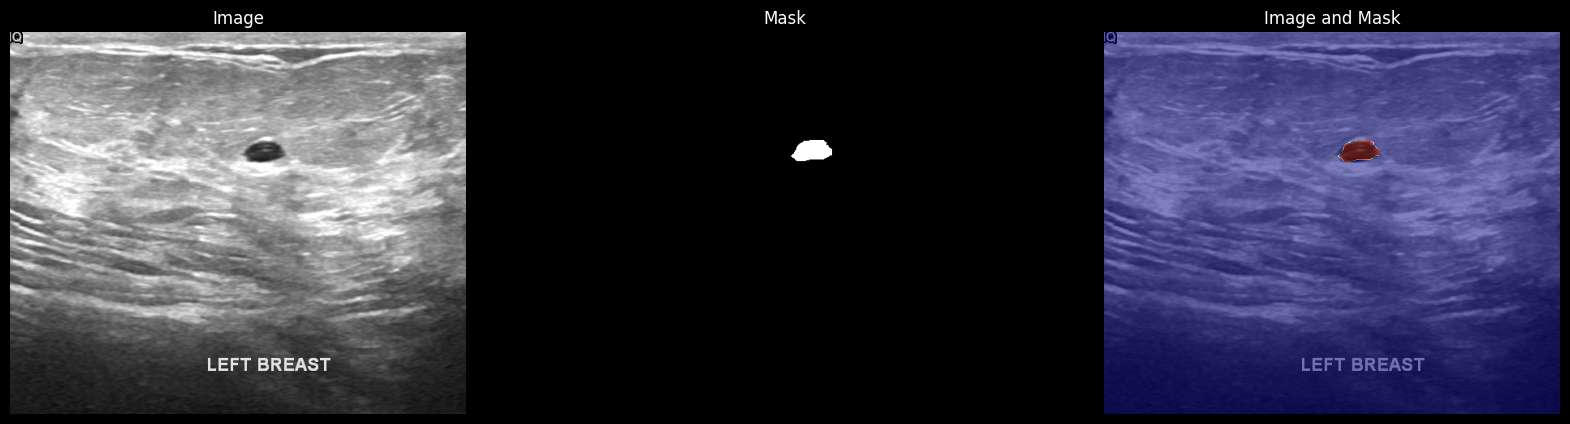

Number of files in gt: 647
Number of files in label: 647


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import cv2

#open csv with correct labels
df=pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/dataset_comment_list.csv')

#print columns
print(df.columns)

print(df.iloc[0, 0]) #print first row and first column

#open data/Dataset_BUSI_with_GT/benign/benign (1)_mask.png
mask = cv2.imread('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/Dataset_BUSI_with_GT/benign/benign (1)_mask.png', cv2.IMREAD_GRAYSCALE)
img= cv2.imread('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/Dataset_BUSI_with_GT/benign/benign (1).png', cv2.IMREAD_GRAYSCALE)


#show the image in subplot 1
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Image')
plt.axis('off')
#show the mask in subplot 2
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')
#show the image and mask in subplot 3
plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')
plt.imshow(mask, cmap='jet', alpha=0.5)
plt.title('Image and Mask')
plt.axis('off')
plt.show()

#loop over Dataset_BUSI_with_GT folders benign, malignant, normal. copy images to data_uncorrected/gt and masks to data_uncorrected/label without classifying them
for folder in ['benign', 'malignant']:#, 'normal']:
    #copy images to data_uncorrected/gt and masks to data_uncorrected/label. if png file finishes with _mask.png, copy to data_uncorrected/label. if png file finishes with .png, copy to data_uncorrected/gt
    for file in glob.glob(f'/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/Dataset_BUSI_with_GT/{folder}/*.png'):
        #if file ends with _mask.png, copy to data_uncorrected/label
        if file.endswith('_mask.png'):
            shutil.copy(file, f'/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_uncorrected/label/{os.path.basename(file)}')
        #if file ends with .png, copy to data_uncorrected/gt
        elif file.endswith(').png'):
            shutil.copy(file, f'/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_uncorrected/gt/{os.path.basename(file)}')

#check if data_uncorrected/gt and data_uncorrected/label have the same number of files
gt_files = len(os.listdir('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_uncorrected/gt'))
label_files = len(os.listdir('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_uncorrected/label'))
print(f'Number of files in gt: {gt_files}')
print(f'Number of files in label: {label_files}')

# This is the preprocessing step. With correction of duplicates i will consider 457 tumors (non normal patients).

In [35]:
import pandas as pd
import os
import shutil

# 1) Lee el CSV con separador “;”
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/dataset_comment_list.csv',
    sep=';', 
    dtype=str
)

# 2) Quita las llaves de ID y Filename
for col in ['ID', 'Filename']:
    df[col] = df[col].str.replace(r'[{}]', '', regex=True)

# 3) Filtra sólo filas con Objection vacío
df = df[df['Objection'].fillna('').str.strip() == ''].copy()

# 4) Separa por “&” y quédate con la primera parte
df['ID_single']       = df['ID'].str.split('&').str[0]
df['Filename_single'] = df['Filename'].str.split('&').str[0]

# 4.5) Filtra sólo benign y malignant
#    extraemos la “clase” por la primera palabra de Filename_single
df['clase'] = df['Filename_single'].str.split().str[0]
df = df[df['clase'].isin(['benign', 'malignant'])]

# 5) Elimina duplicados por ID_single (que ya no tienen “&”)
df = df.drop_duplicates(subset='ID_single', keep='first')

# 6) Copiado de archivos
ORIGEN_BASE = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/Dataset_BUSI_with_GT'
DEST_IMG    = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_corrected_w_annotation/gt'
DEST_MASK   = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_corrected_w_annotation/label'
os.makedirs(DEST_IMG,  exist_ok=True)
os.makedirs(DEST_MASK, exist_ok=True)

for _, row in df.iterrows():
    fname = row['Filename_single']           # ej. "benign (1)"
    clase  = row['clase']                    # "benign" o "malignant"
    img_fn = f"{fname}.png"
    mask_fn= f"{fname}_mask.png"

    src_img  = os.path.join(ORIGEN_BASE, clase, img_fn)
    src_mask = os.path.join(ORIGEN_BASE, clase, mask_fn)

    if os.path.isfile(src_img):
        shutil.copy(src_img,  os.path.join(DEST_IMG, img_fn))
    else:
        print(f"No encuentro imagen: {src_img}")

    if os.path.isfile(src_mask):
        shutil.copy(src_mask, os.path.join(DEST_MASK, mask_fn))
    # si te molesta el mensaje, coméntalo:
    else:
        print(f"– sin máscara: {src_mask}")

#count benign and malignant in data_corrected/gt, if file starts with benign, count as benign, if file starts with malignant, count as malignant
benign = 0
malignant = 0
for file in os.listdir('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_corrected_w_annotation/gt'):
    if file.startswith('benign'):
        benign += 1
    elif file.startswith('malignant'):
        malignant += 1
print(f'Number of benign files: {benign}')
print(f'Number of malignant files: {malignant}')


Number of benign files: 296
Number of malignant files: 161


# This is the preprocessing step. With correction of duplicates AND deletion of annotated images i will consider 332 tumors (non normal patients).

In [36]:
import pandas as pd
import os
import shutil

# 1) Lee el CSV con separador “;”
df = pd.read_csv('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/dataset_comment_list.csv',
    sep=';', 
    dtype=str
)

# 2) Quita las llaves de ID y Filename
for col in ['ID', 'Filename']:
    df[col] = df[col].str.replace(r'[{}]', '', regex=True)

# 3) Filtra sólo filas con Objection vacío
df = df[df['Objection'].fillna('').str.strip() == ''].copy()

# Filtra solo filas con Annotation vacío
df = df[df['Annotation'].fillna('').str.strip() == ''].copy()

# 4) Separa por “&” y quédate con la primera parte
df['ID_single']       = df['ID'].str.split('&').str[0]
df['Filename_single'] = df['Filename'].str.split('&').str[0]

# 4.5) Filtra sólo benign y malignant
#    extraemos la “clase” por la primera palabra de Filename_single
df['clase'] = df['Filename_single'].str.split().str[0]
df = df[df['clase'].isin(['benign', 'malignant'])]

# 5) Elimina duplicados por ID_single (que ya no tienen “&”)
df = df.drop_duplicates(subset='ID_single', keep='first')

# 6) Copiado de archivos
ORIGEN_BASE = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/Dataset_BUSI_with_GT'
DEST_IMG    = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_corrected_wo_annotation/gt'
DEST_MASK   = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_corrected_wo_annotation/label'
os.makedirs(DEST_IMG,  exist_ok=True)
os.makedirs(DEST_MASK, exist_ok=True)

for _, row in df.iterrows():
    fname = row['Filename_single']           # ej. "benign (1)"
    clase  = row['clase']                    # "benign" o "malignant"
    img_fn = f"{fname}.png"
    mask_fn= f"{fname}_mask.png"

    src_img  = os.path.join(ORIGEN_BASE, clase, img_fn)
    src_mask = os.path.join(ORIGEN_BASE, clase, mask_fn)

    if os.path.isfile(src_img):
        shutil.copy(src_img,  os.path.join(DEST_IMG, img_fn))
    else:
        print(f"No encuentro imagen: {src_img}")

    if os.path.isfile(src_mask):
        shutil.copy(src_mask, os.path.join(DEST_MASK, mask_fn))
    # si te molesta el mensaje, coméntalo:
    else:
        print(f"– sin máscara: {src_mask}")

#count benign and malignant in data_corrected/gt, if file starts with benign, count as benign, if file starts with malignant, count as malignant
benign = 0
malignant = 0
for file in os.listdir('/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_corrected_wo_annotation/gt'):
    if file.startswith('benign'):
        benign += 1
    elif file.startswith('malignant'):
        malignant += 1
print(f'Number of benign files: {benign}')
print(f'Number of malignant files: {malignant}')


Number of benign files: 205
Number of malignant files: 127


In [43]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# 1) Lista todos los PNG y determina su etiqueta
data_dir = '/Users/emilio/Library/CloudStorage/Box-Box/GitHub/first_year_exam/data/data_uncorrected/gt'
all_files = [f for f in os.listdir(data_dir) if f.lower().endswith('.png')]

df = pd.DataFrame({'file_name': all_files})

print(f"Total de imágenes: {len(df)}")
df['label'] = df['file_name'].apply(lambda fn: 'malignant' if fn.lower().startswith('malignant') else 'benign')

# 2) Primero separa TRAIN vs TEMP (test+val) garantizando 100 imágenes en TEMP
train_df, temp_df = train_test_split(
    df,
    test_size=100,                # número absoluto de imágenes para TEMP
    stratify=df['label'],         # estratificar por 'label'
    random_state=42
)

# 3) Divide TEMP en VALIDATION y TEST, 50 imágenes cada uno
val_df, test_df = train_test_split(
    temp_df,
    test_size=50,                 # número absoluto de imágenes para TEST
    stratify=temp_df['label'],
    random_state=42
)

# 4) Dejamos sólo la columna file_name y volcamos a CSV
for split_name, split_df in [('train', train_df), ('validation', val_df), ('test', test_df)]:
    out = split_df[['file_name']].reset_index(drop=True)
    out.to_csv(f'{split_name}.csv', index=False)
    print(f'{split_name}.csv → {len(out)} imágenes '
          f'({out["file_name"].tolist()[:3]} …)')

# Opcional: ver distribución por clase en cada partición
print("\nDistribución de clases:")
for name, d in [('train', train_df), ('val', val_df), ('test', test_df)]:
    vc = d['label'].value_counts()
    print(f"  {name}: malignant={vc.get('malignant',0)}, benign={vc.get('benign',0)}")


Total de imágenes: 647
train.csv → 547 imágenes (['benign (228).png', 'benign (309).png', 'benign (93).png'] …)
validation.csv → 50 imágenes (['benign (412).png', 'malignant (76).png', 'benign (57).png'] …)
test.csv → 50 imágenes (['malignant (64).png', 'benign (190).png', 'benign (368).png'] …)

Distribución de clases:
  train: malignant=178, benign=369
  val: malignant=16, benign=34
  test: malignant=16, benign=34
